In [19]:
#라이브러리 로드
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
import os
print(os.getcwd())

c:\Users\ieunh\Downloads


In [6]:
import os
os.chdir(r'C:\Users\ieunh\Downloads\archive')
print(os.getcwd())

C:\Users\ieunh\Downloads\archive


In [12]:
#데이터 로드.
data= pd.read_csv(r'C:\Users\ieunh\Downloads\archive\student_health_data.csv')
print(data.head(10))
print(data.columns)

   Student_ID  Age Gender  Heart_Rate  Blood_Pressure_Systolic  \
0           1   24      M   50.663217               122.173015   
1           2   21      F   57.926042               110.778407   
2           3   22      M   59.294219               109.375673   
3           4   24      M   76.826232               125.142227   
4           5   20      M   68.342769               107.515592   
5           6   22      M   61.744152                90.000000   
6           7   22      F   93.097228               106.677782   
7           8   24      F   63.361031               115.396783   
8           9   19      F   81.671029               142.820977   
9          10   20      M   86.211086               112.635938   

   Blood_Pressure_Diastolic  Stress_Level_Biosensor  Stress_Level_Self_Report  \
0                 84.419860                3.137350                  9.028669   
1                 75.696145                3.699078                  5.819697   
2                 83.803814   

In [13]:
#전처리
label_encoder=LabelEncoder()

#숫자로
for c in data.select_dtypes(include=['object']).columns:
    data[c]=label_encoder.fit_transform(data[c])
    
#features vs target
features = [
    'Blood_Pressure_Diastolic', 'Stress_Level_Biosensor',
       'Stress_Level_Self_Report', 'Physical_Activity', 'Sleep_Quality',
       'Mood', 'Study_Hours', 'Project_Hours'
]
target=['Health_Risk_Level']

X=data[features]
y=data['Health_Risk_Level']

#학습 vs 평가
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2024)

In [14]:
#모델 학습
rf_model=RandomForestClassifier(random_state=2024)
rf_model.fit(X_train,y_train)

dt_model=DecisionTreeClassifier(random_state=2024)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2024)

In [16]:
#예측 & 평가

rfy_pred=rf_model.predict(X_test)
dty_pred=dt_model.predict(X_test)

accuracy = accuracy_score(y_test, rfy_pred)
accuracy = accuracy_score(y_test, dty_pred)

# 결과 출력
print("랜덤 포레스트 성능 평가:")
print(f"정확도(Accuracy): {accuracy:.4f}")
print("\n분류 리포트(Classification Report):")
print(classification_report(y_test, rfy_pred))

print("결정 트리 성능 평가:")
print(f"정확도(Accuracy): {accuracy:.4f}")
print("\n분류 리포트(Classification Report):")
print(classification_report(y_test, dty_pred))

랜덤 포레스트 성능 평가:
정확도(Accuracy): 1.0000

분류 리포트(Classification Report):
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       1.00      1.00      1.00        16
           2       0.99      1.00      0.99        69

    accuracy                           0.99       100
   macro avg       1.00      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100

결정 트리 성능 평가:
정확도(Accuracy): 1.0000

분류 리포트(Classification Report):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        69

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



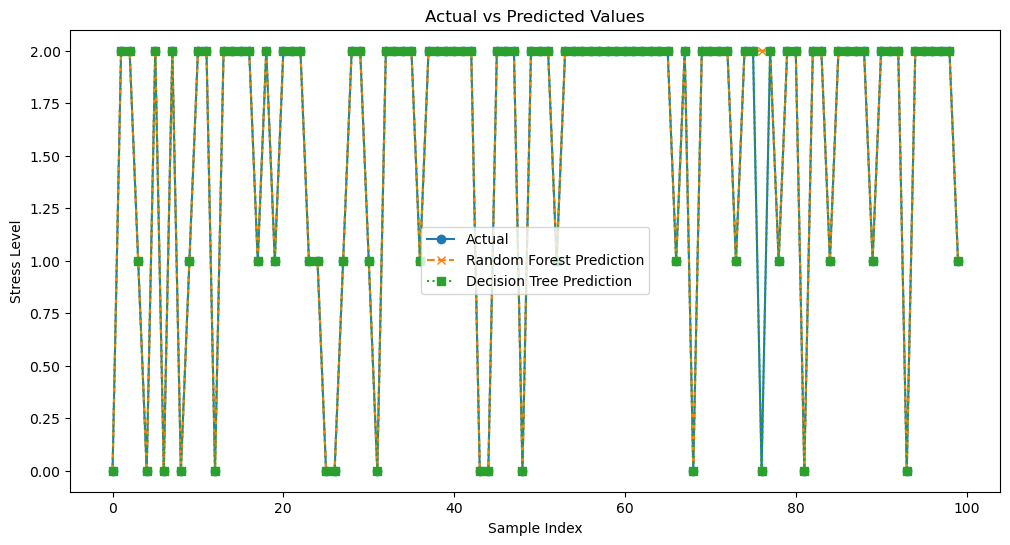

In [17]:
#예측값 vs 실제값
comparison_df = pd.DataFrame({
    'Actual': y_test.reset_index(drop=True),
    'Random Forest Prediction': rfy_pred,
    'Decision Tree Prediction': dty_pred
})

plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index, comparison_df['Actual'], label='Actual', marker='o')
plt.plot(comparison_df.index, comparison_df['Random Forest Prediction'], label='Random Forest Prediction', linestyle='--', marker='x')
plt.plot(comparison_df.index, comparison_df['Decision Tree Prediction'], label='Decision Tree Prediction', linestyle=':', marker='s')
plt.title("Actual vs Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("Stress Level")
plt.legend()
plt.show()

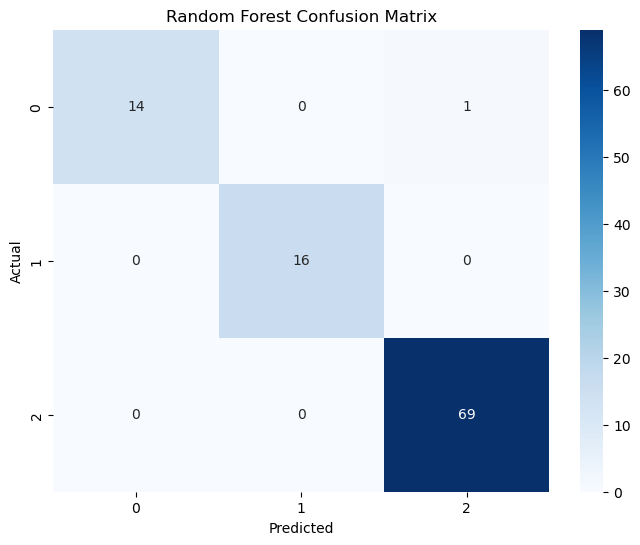

In [20]:
from sklearn.metrics import confusion_matrix

rf_conf_matrix = confusion_matrix(y_test, rfy_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

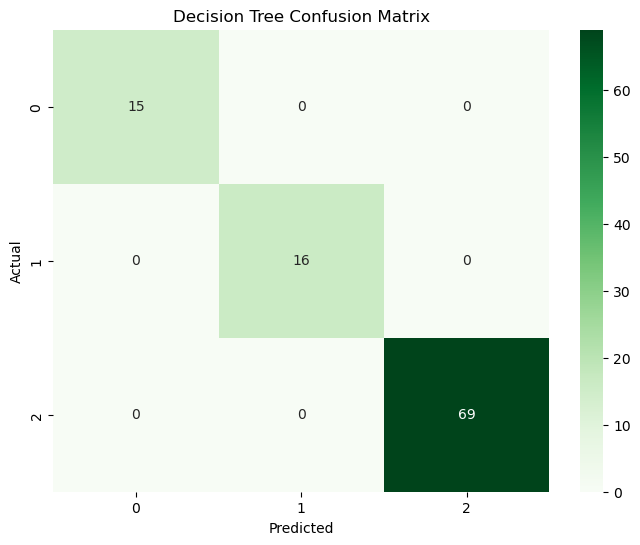

In [21]:
dt_conf_matrix = confusion_matrix(y_test, dty_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()